<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Cell-Tidy-Data" data-toc-modified-id="Cell-Tidy-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cell Tidy Data</a></span></li><li><span><a href="#Gene-Metadata" data-toc-modified-id="Gene-Metadata-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gene Metadata</a></span></li></ul></li><li><span><a href="#Basic-Info" data-toc-modified-id="Basic-Info-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Info</a></span><ul class="toc-item"><li><span><a href="#QC-metric" data-toc-modified-id="QC-metric-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>QC metric</a></span></li><li><span><a href="#Experimental-Batches" data-toc-modified-id="Experimental-Batches-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Experimental Batches</a></span></li></ul></li><li><span><a href="#Marker-Genes" data-toc-modified-id="Marker-Genes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Marker Genes</a></span><ul class="toc-item"><li><span><a href="#mCH-Marker" data-toc-modified-id="mCH-Marker-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>mCH Marker</a></span></li><li><span><a href="#mCG-marker-for-glias" data-toc-modified-id="mCG-marker-for-glias-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>mCG marker for glias</a></span></li><li><span><a href="#Individual-Cluster-Marker" data-toc-modified-id="Individual-Cluster-Marker-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Individual Cluster Marker</a></span></li></ul></li><li><span><a href="#Cluster-Annotation" data-toc-modified-id="Cluster-Annotation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster Annotation</a></span></li></ul></div>

# Methylation Cluster Annotation

In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cemba_data package is here: https://github.com/lhqing/cemba_data
# ALLCools package is here: https://github.com/lhqing/ALLCools
from cemba_data.plot import *

In [2]:
study_name = 'MOp_mC_clustering'
result_dir = pathlib.Path(f'./{study_name}')
result_dir.mkdir(exist_ok=True)
fig_dir = result_dir / 'fig'
fig_dir.mkdir(exist_ok=True)

## Load Data

### Cell Tidy Data

In [3]:
cell_tidy_data = pd.read_msgpack(result_dir / 'cell_tidy_data.msg')
cell_tidy_data_cg = pd.read_msgpack(result_dir / 'cell_tidy_data.mCG.msg')

In [4]:
cell_tidy_data.columns[:32]

Index(['cell', 'leiden', 'AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj',
       'CH_Rate', 'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads',
       'Region', 'index_name', 'uid', 'BamFilteringRate', 'MappingRate',
       'Pos96', 'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'Batch',
       'PassFilter', 'tsne_0', 'tsne_1', 'umap_0', 'umap_1', 'pca_0', 'pca_1',
       'pca_2', 'pca_3'],
      dtype='object')

### Gene Metadata

In [5]:
gene_meta = pd.read_csv('../dataset/mC/gencode.vM16.annotation.gene.flat.tsv.gz', 
                          index_col='gene_id', sep='\t')
gene_meta.index.name = 'gene'
gene_name_to_id = {v:k for k, v in gene_meta['gene_name'].iteritems()}
gene_idbase_to_id = {i.split('.')[0]: i for i in gene_meta.index}

## Basic Info

### QC metric

In [6]:
_base = 'umap'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


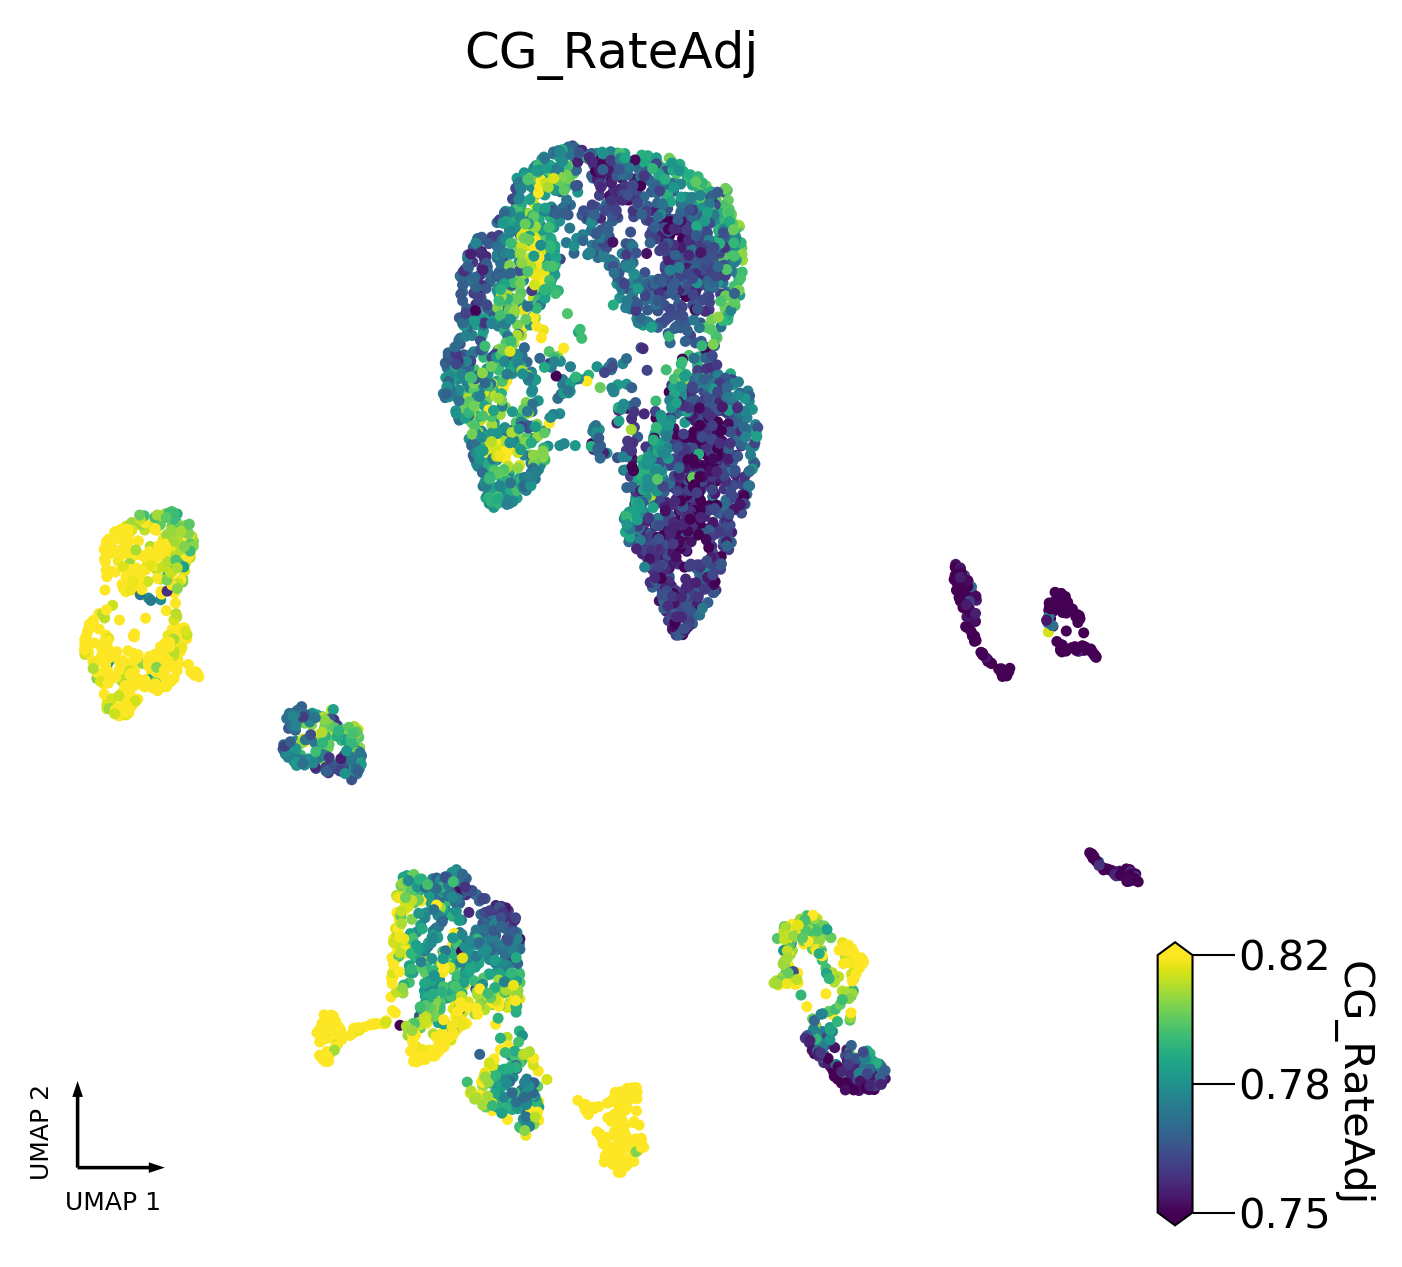

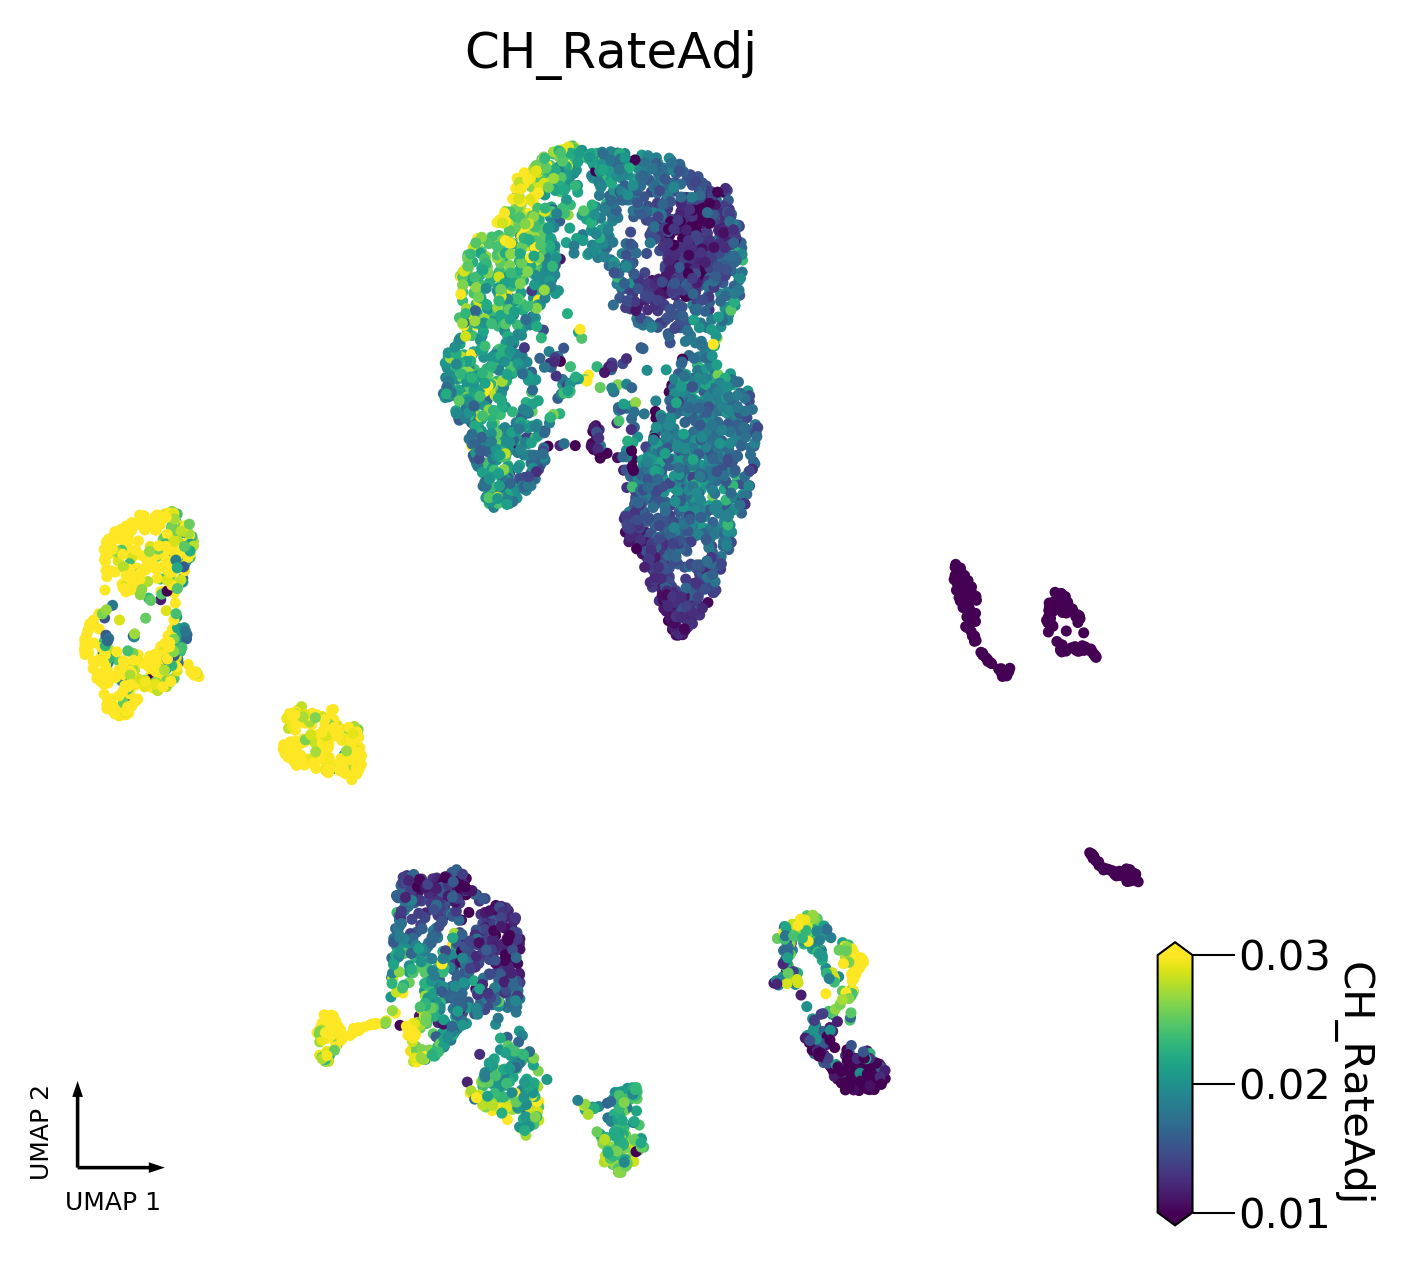

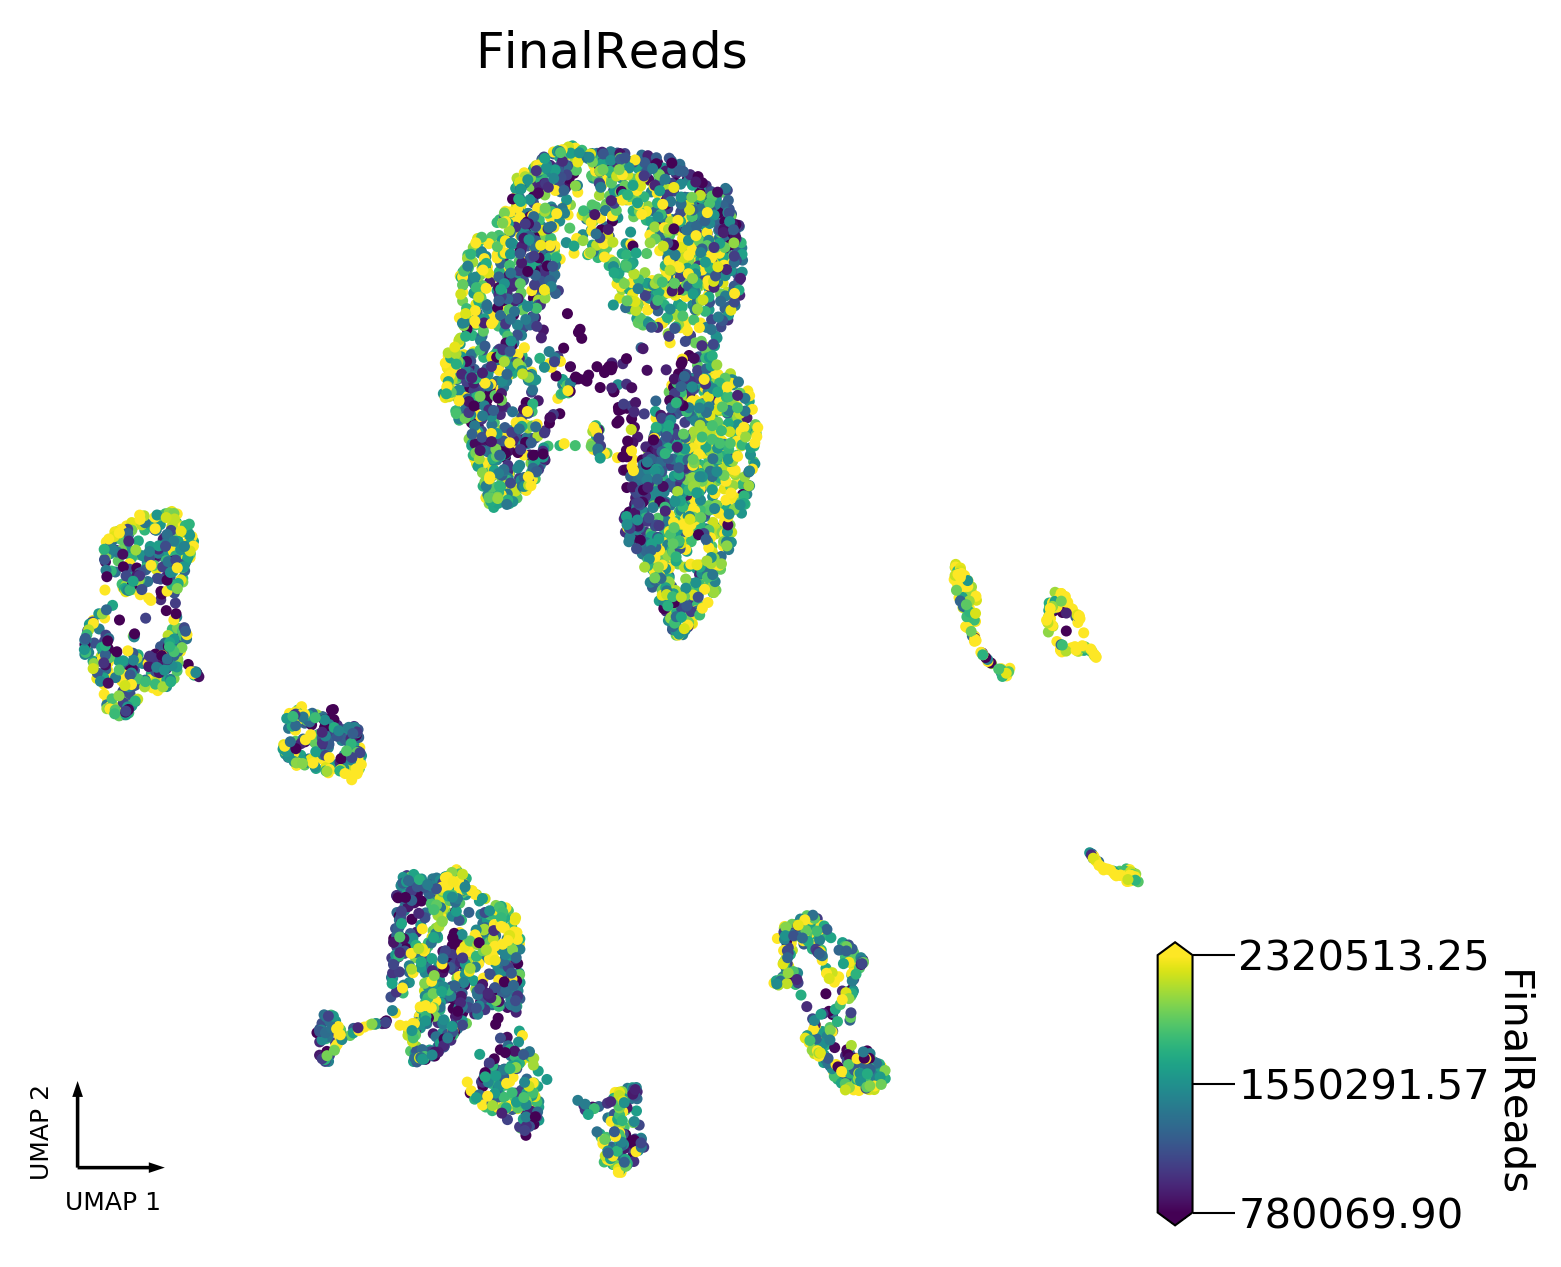

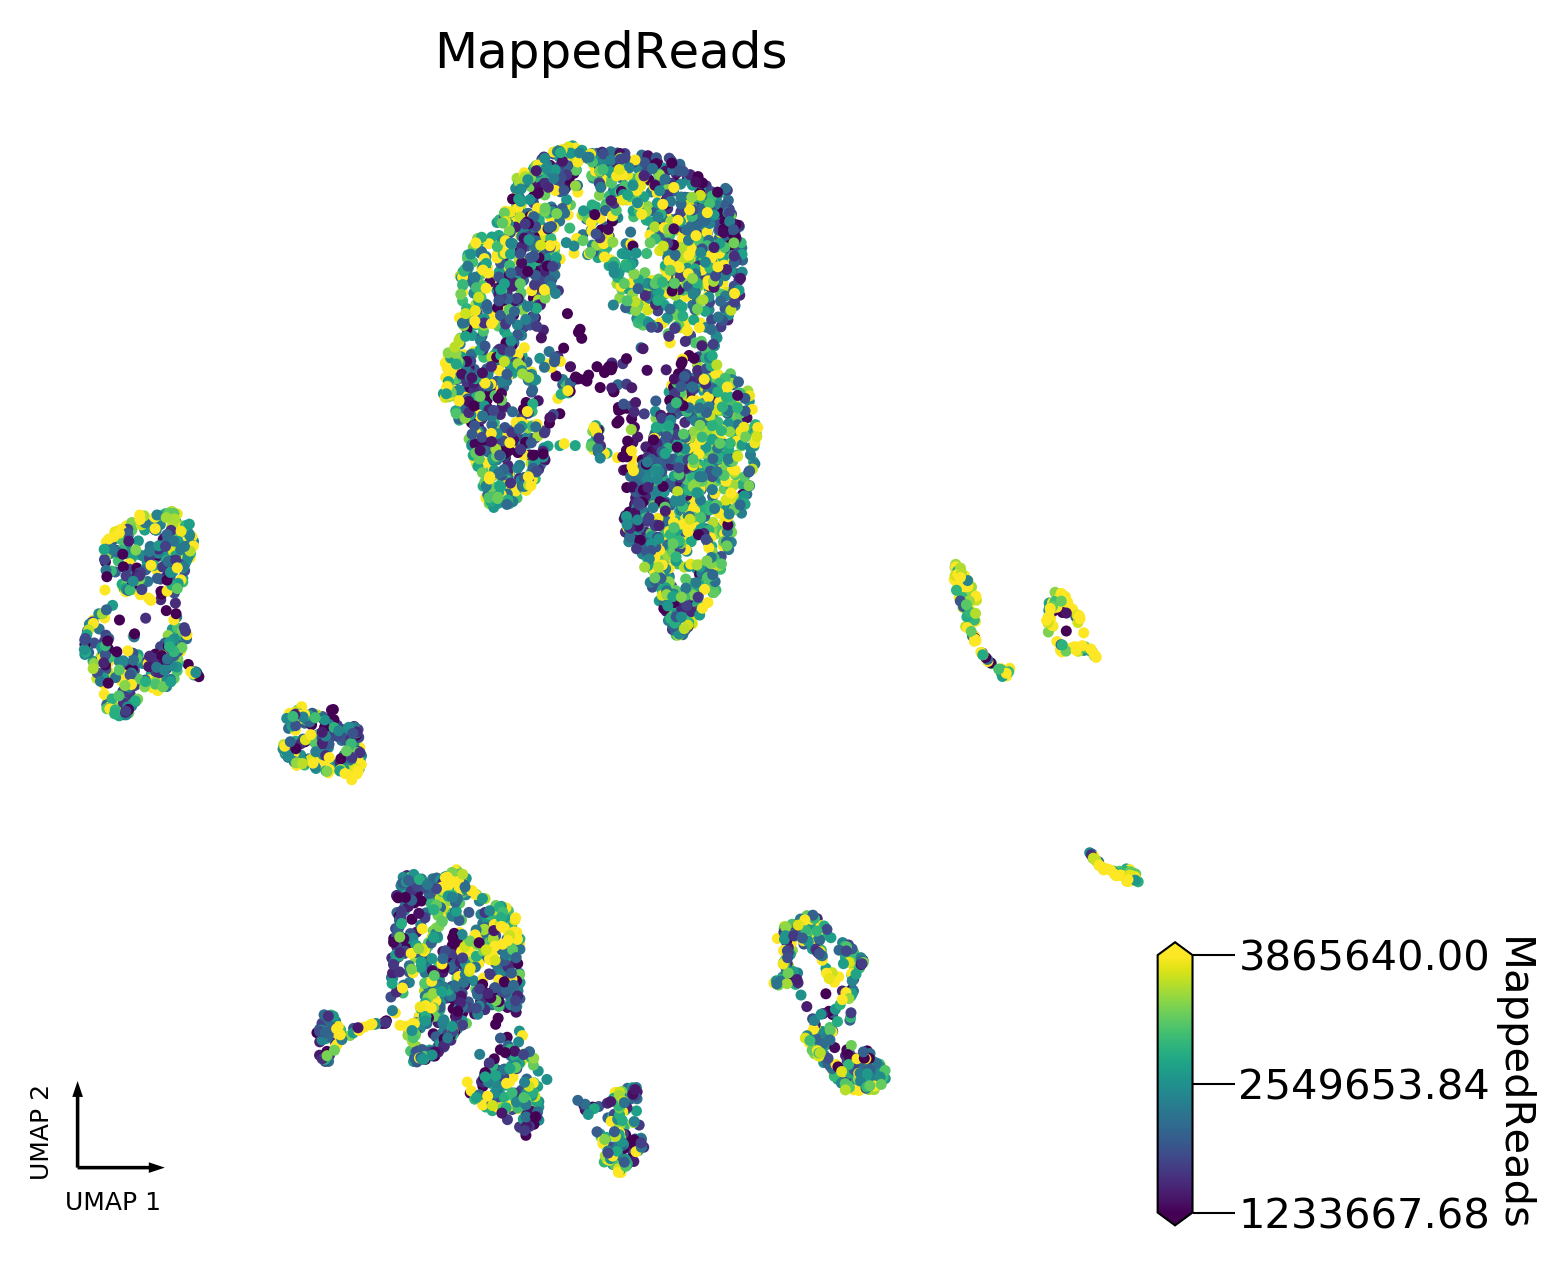

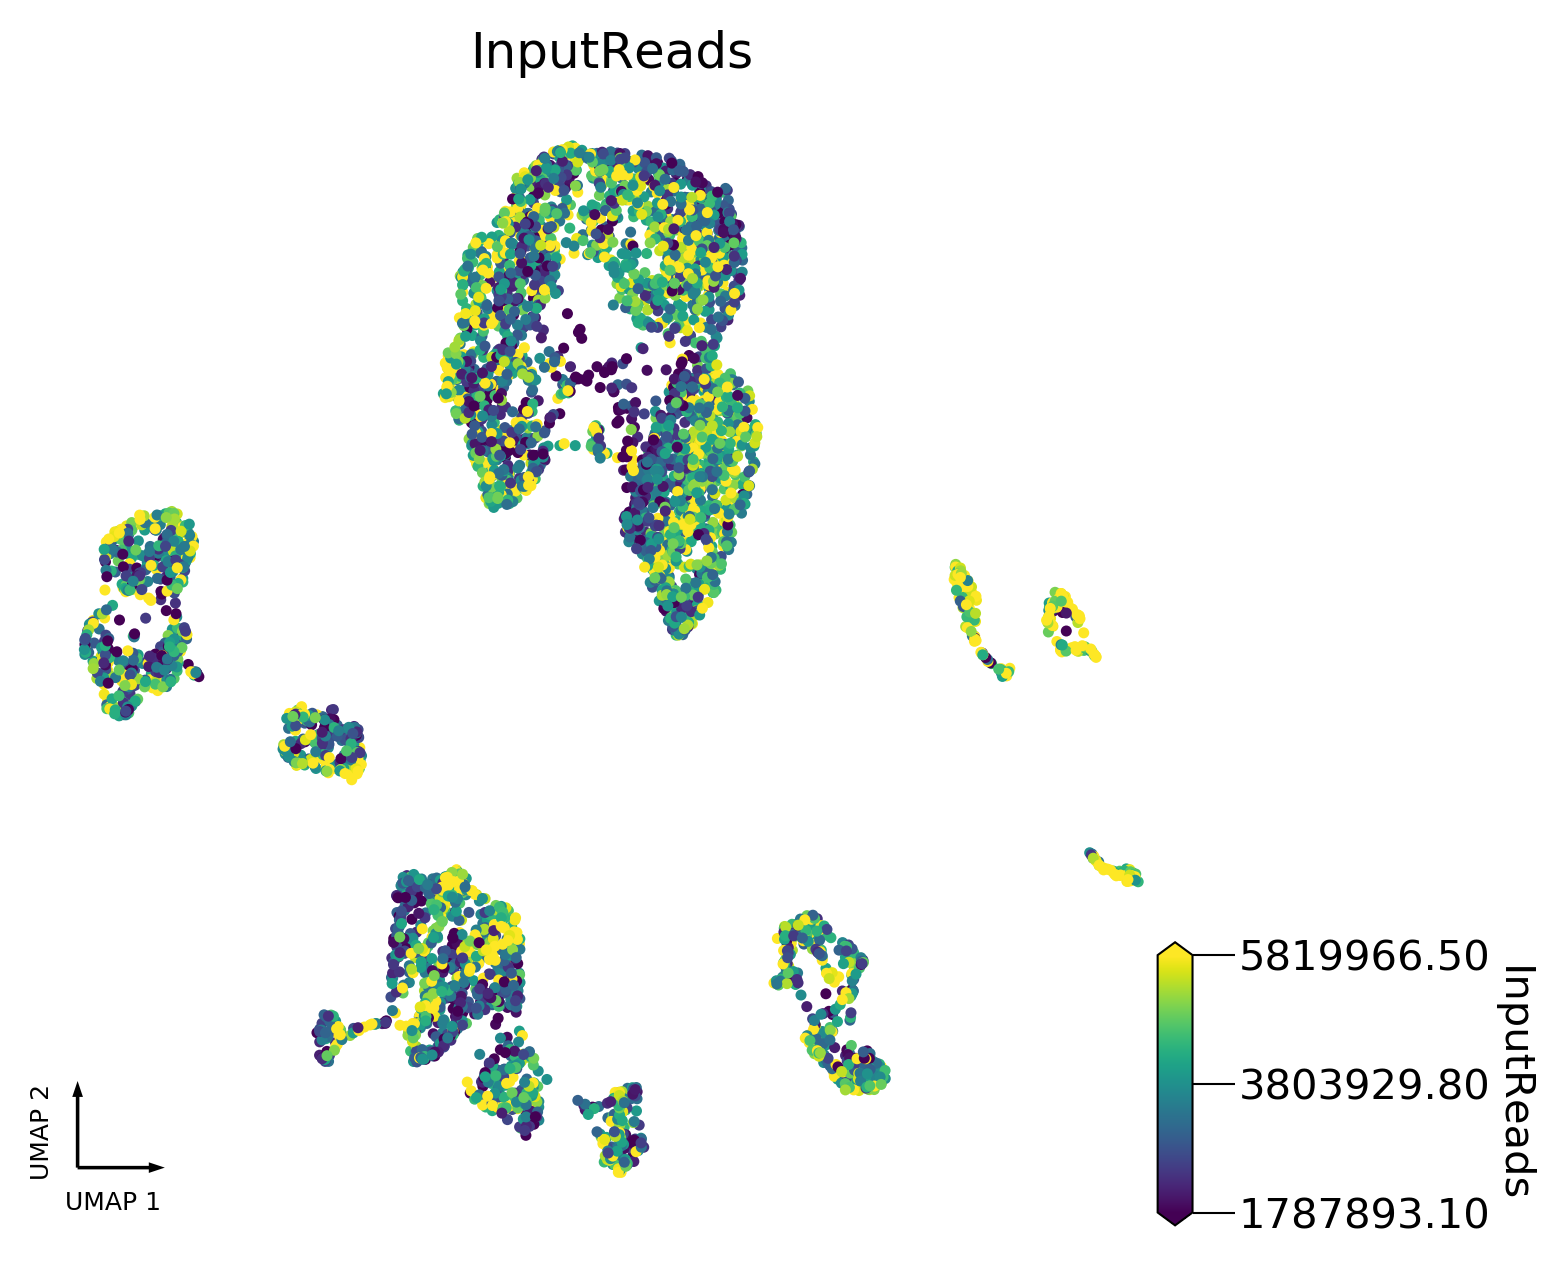

In [7]:
hues = ['CG_RateAdj', 'CH_RateAdj', 'FinalReads', 'MappedReads', 'InputReads']

for hue in hues:
    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
    (ax, cax), _ = continuous_scatter(cell_tidy_data, ax, coord_base=_base, hue=hue)
    ax.set_title(hue)

### Experimental Batches

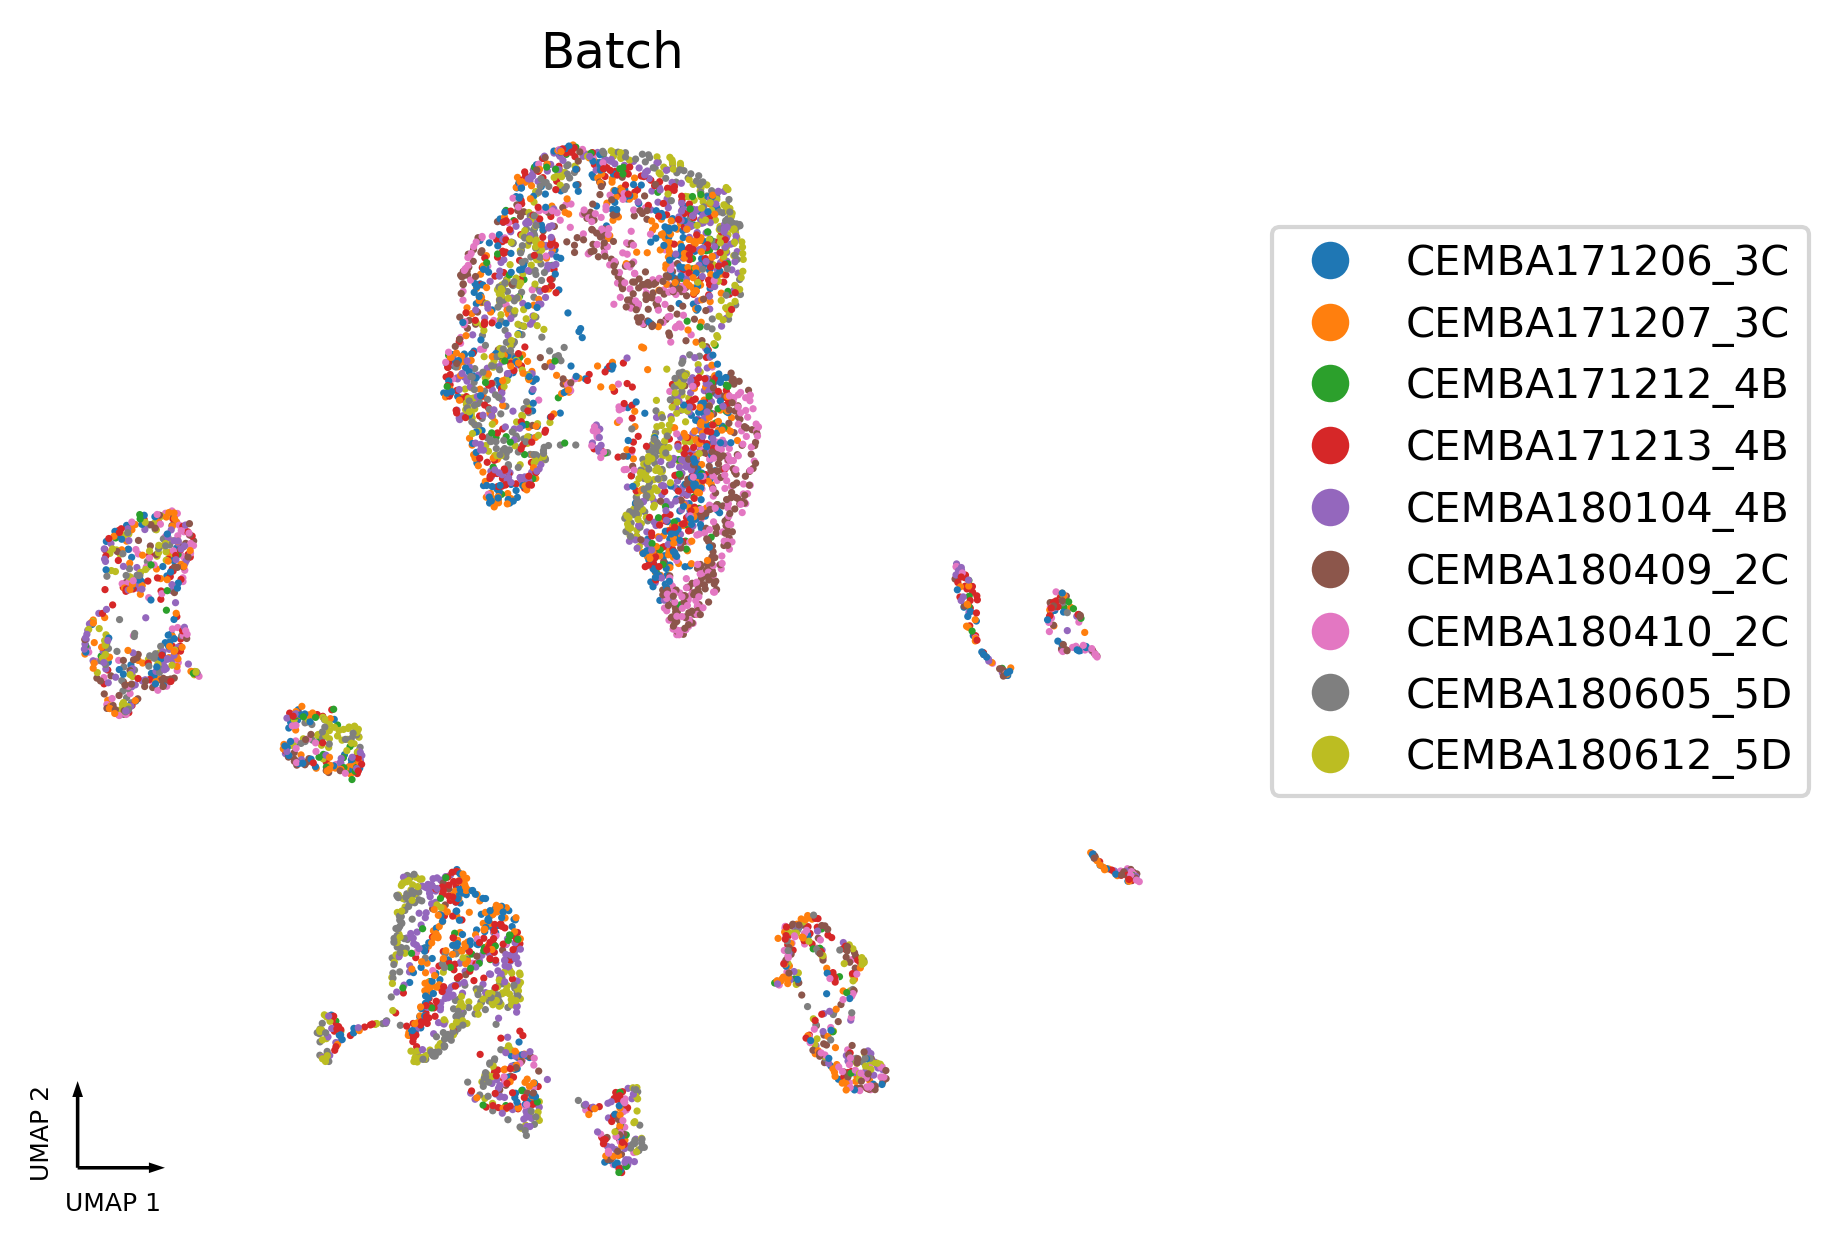

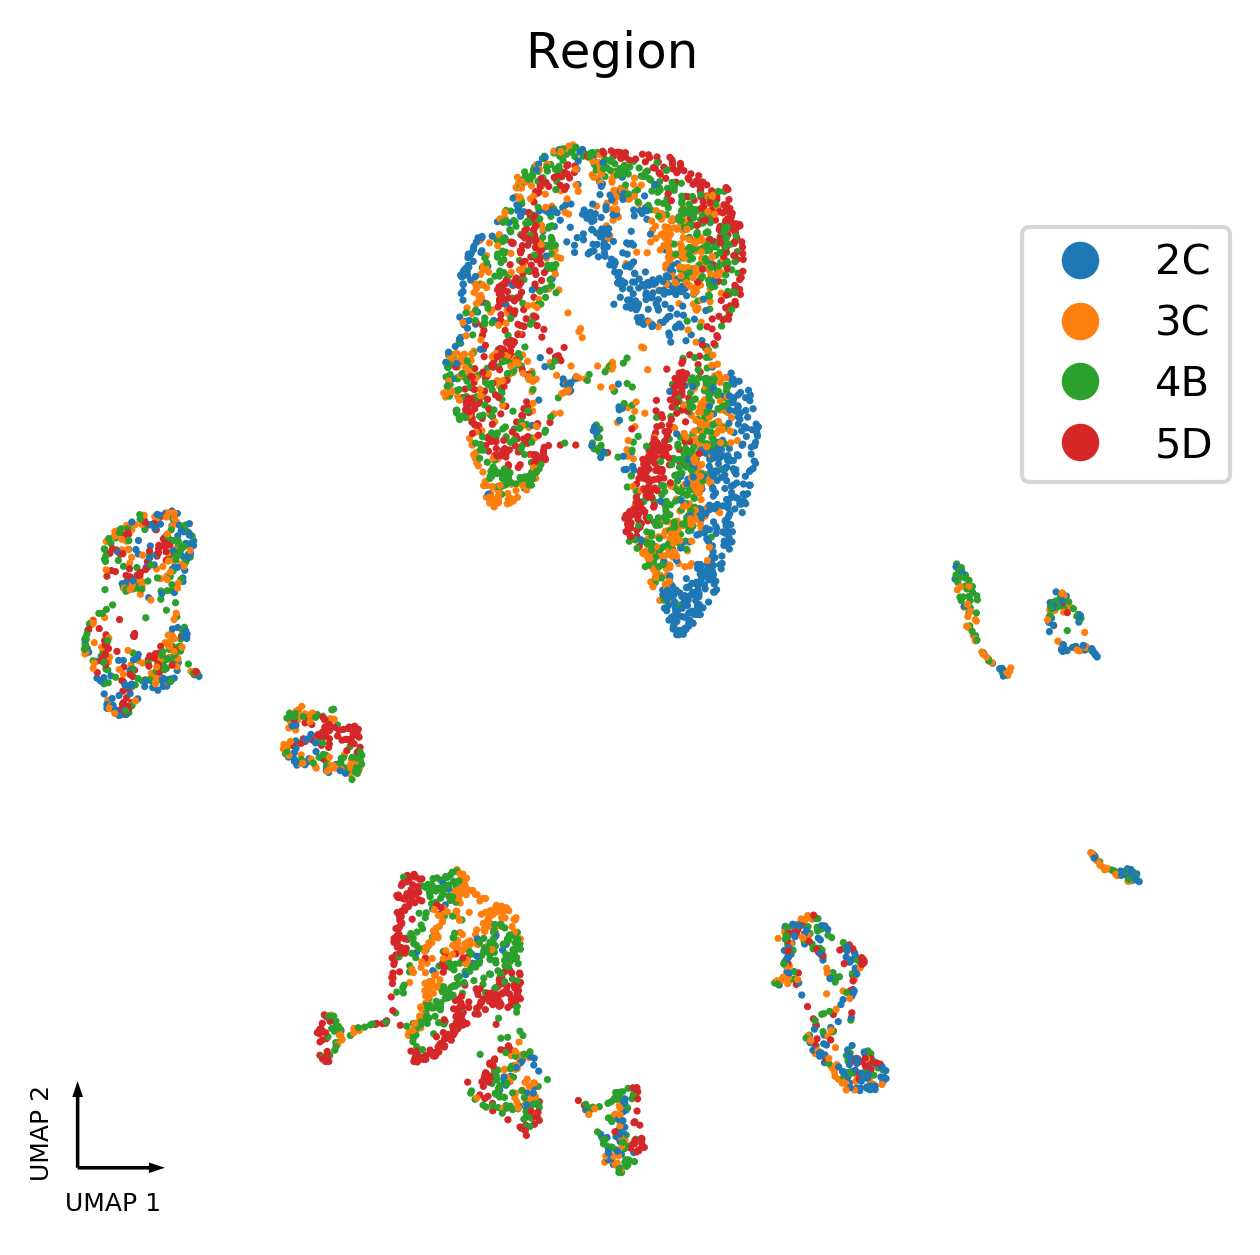

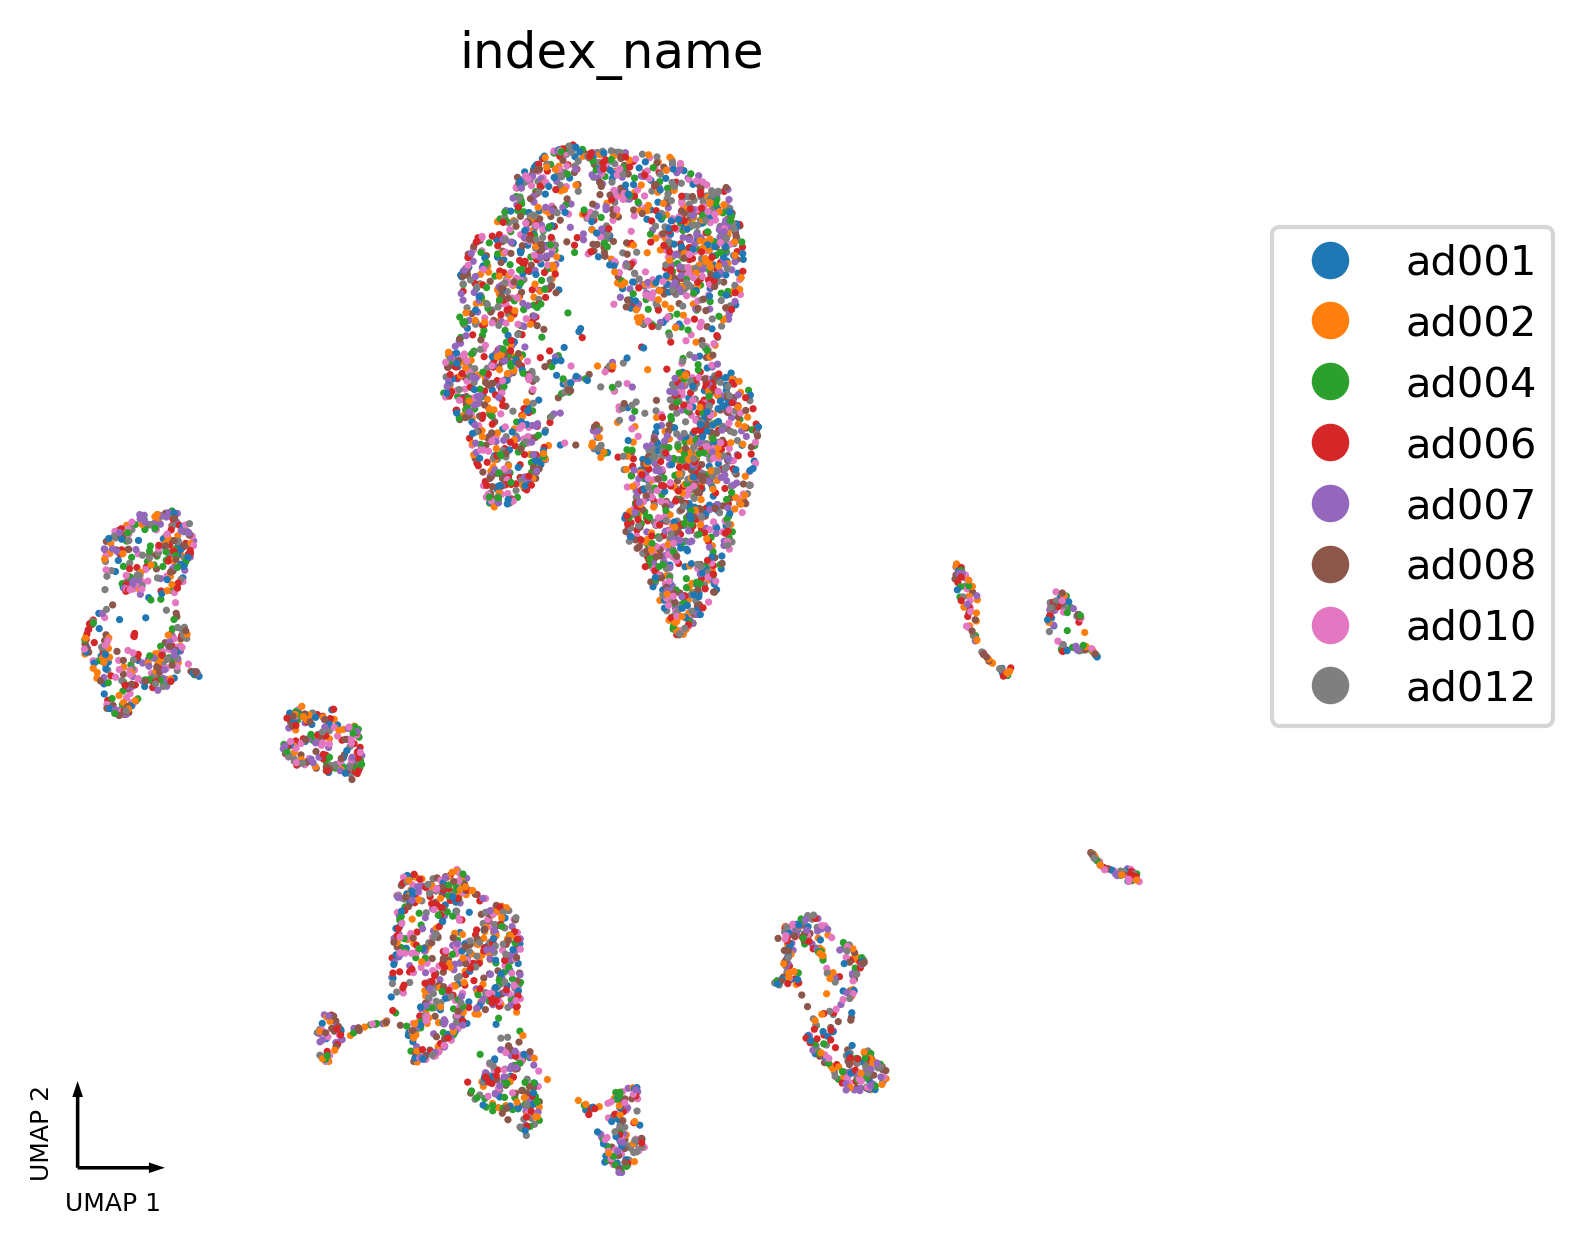

In [8]:
hues = ['Batch', 'Region', 'index_name']

for hue in hues:
    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
    categorical_scatter(cell_tidy_data, 
                        ax, 
                        coord_base=_base, 
                        hue=hue, 
                        show_legend=True,
                        scatter_kws=dict(s=3),
                        legend_kws=dict(bbox_to_anchor=(1.05, 0.9)))
    ax.set_title(hue)

## Marker Genes

### mCH Marker

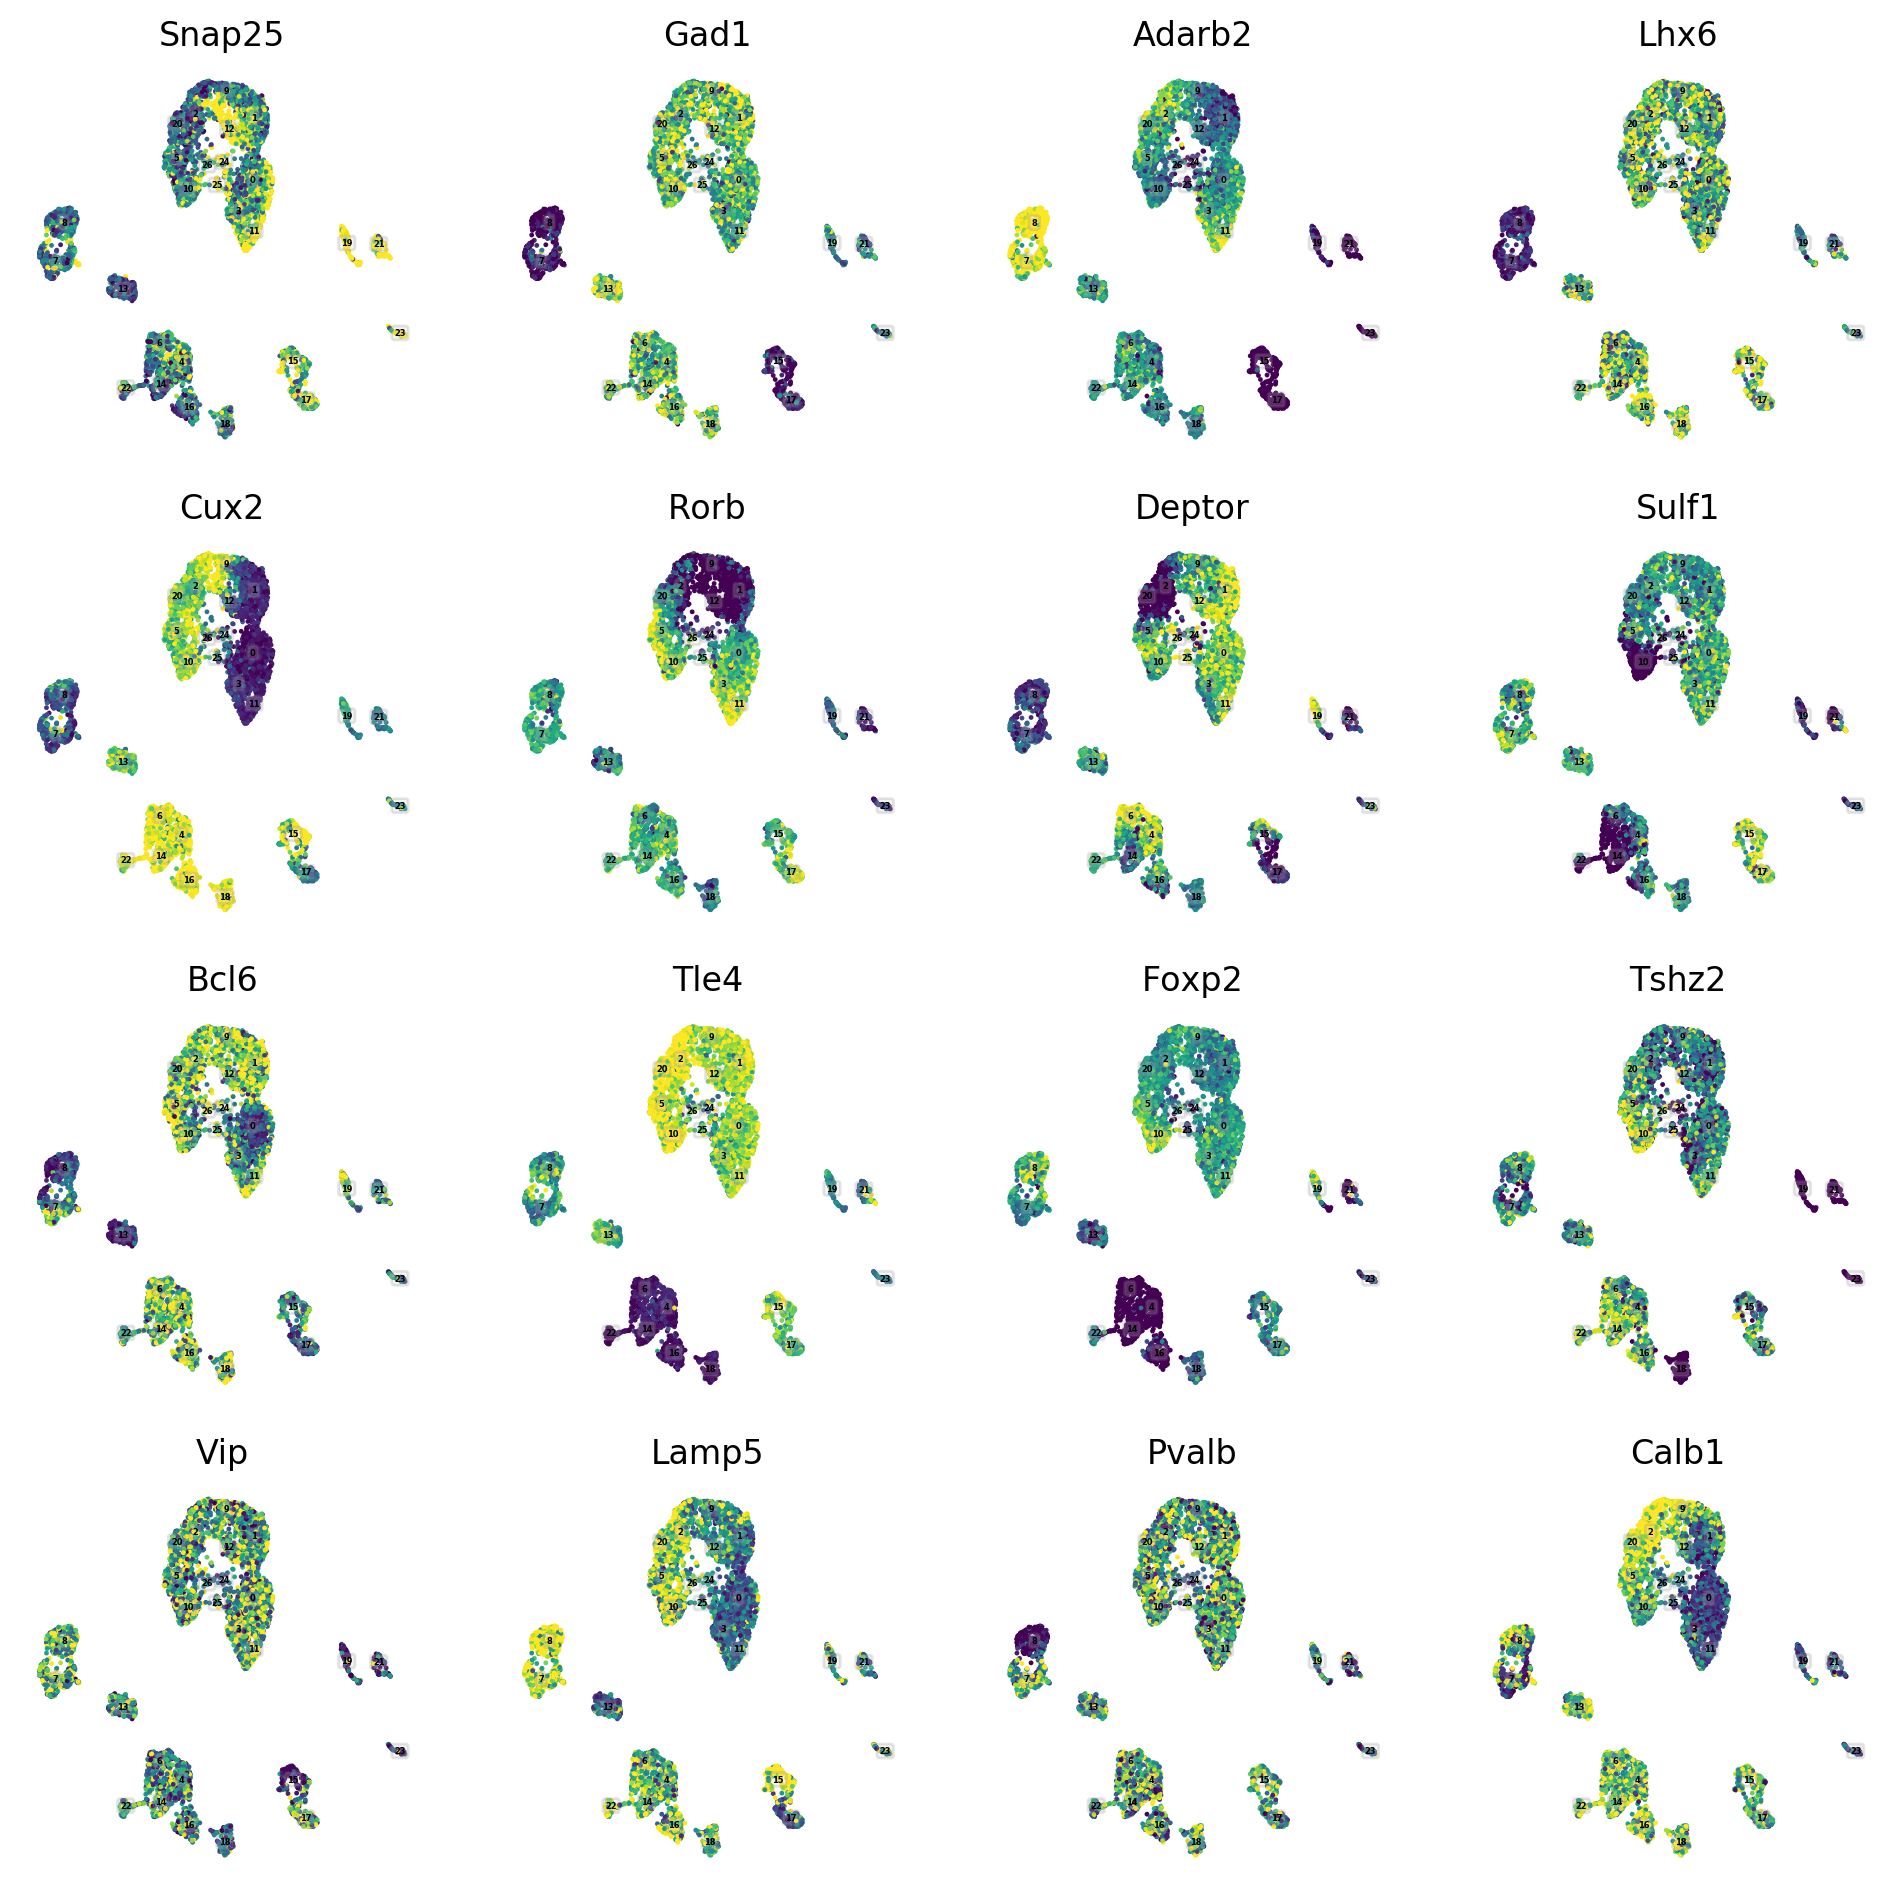

In [15]:
gene_names = ['Snap25', 'Gad1', 'Adarb2', 'Lhx6',
              'Cux2', 'Rorb', 'Deptor', 'Sulf1', 
              'Bcl6', 'Tle4', 'Foxp2', 'Tshz2',
              'Vip', 'Lamp5', 'Pvalb', 'Calb1']

fig, axes = plt.subplots(figsize=(12, 12), dpi=200, nrows=4, ncols=4)
for gene_name, ax in zip(gene_names, axes.flat):
    continuous_scatter(ax=ax, data=cell_tidy_data, cmap='viridis', hue_norm=None,
                       hue=gene_name_to_id[gene_name], text_anno='leiden', scatter_kws=dict(s=3),
                       colorbar=None, axis_format=None, text_anno_kws=dict(fontsize=3))
    ax.set_title(gene_name)

### mCG marker for glias

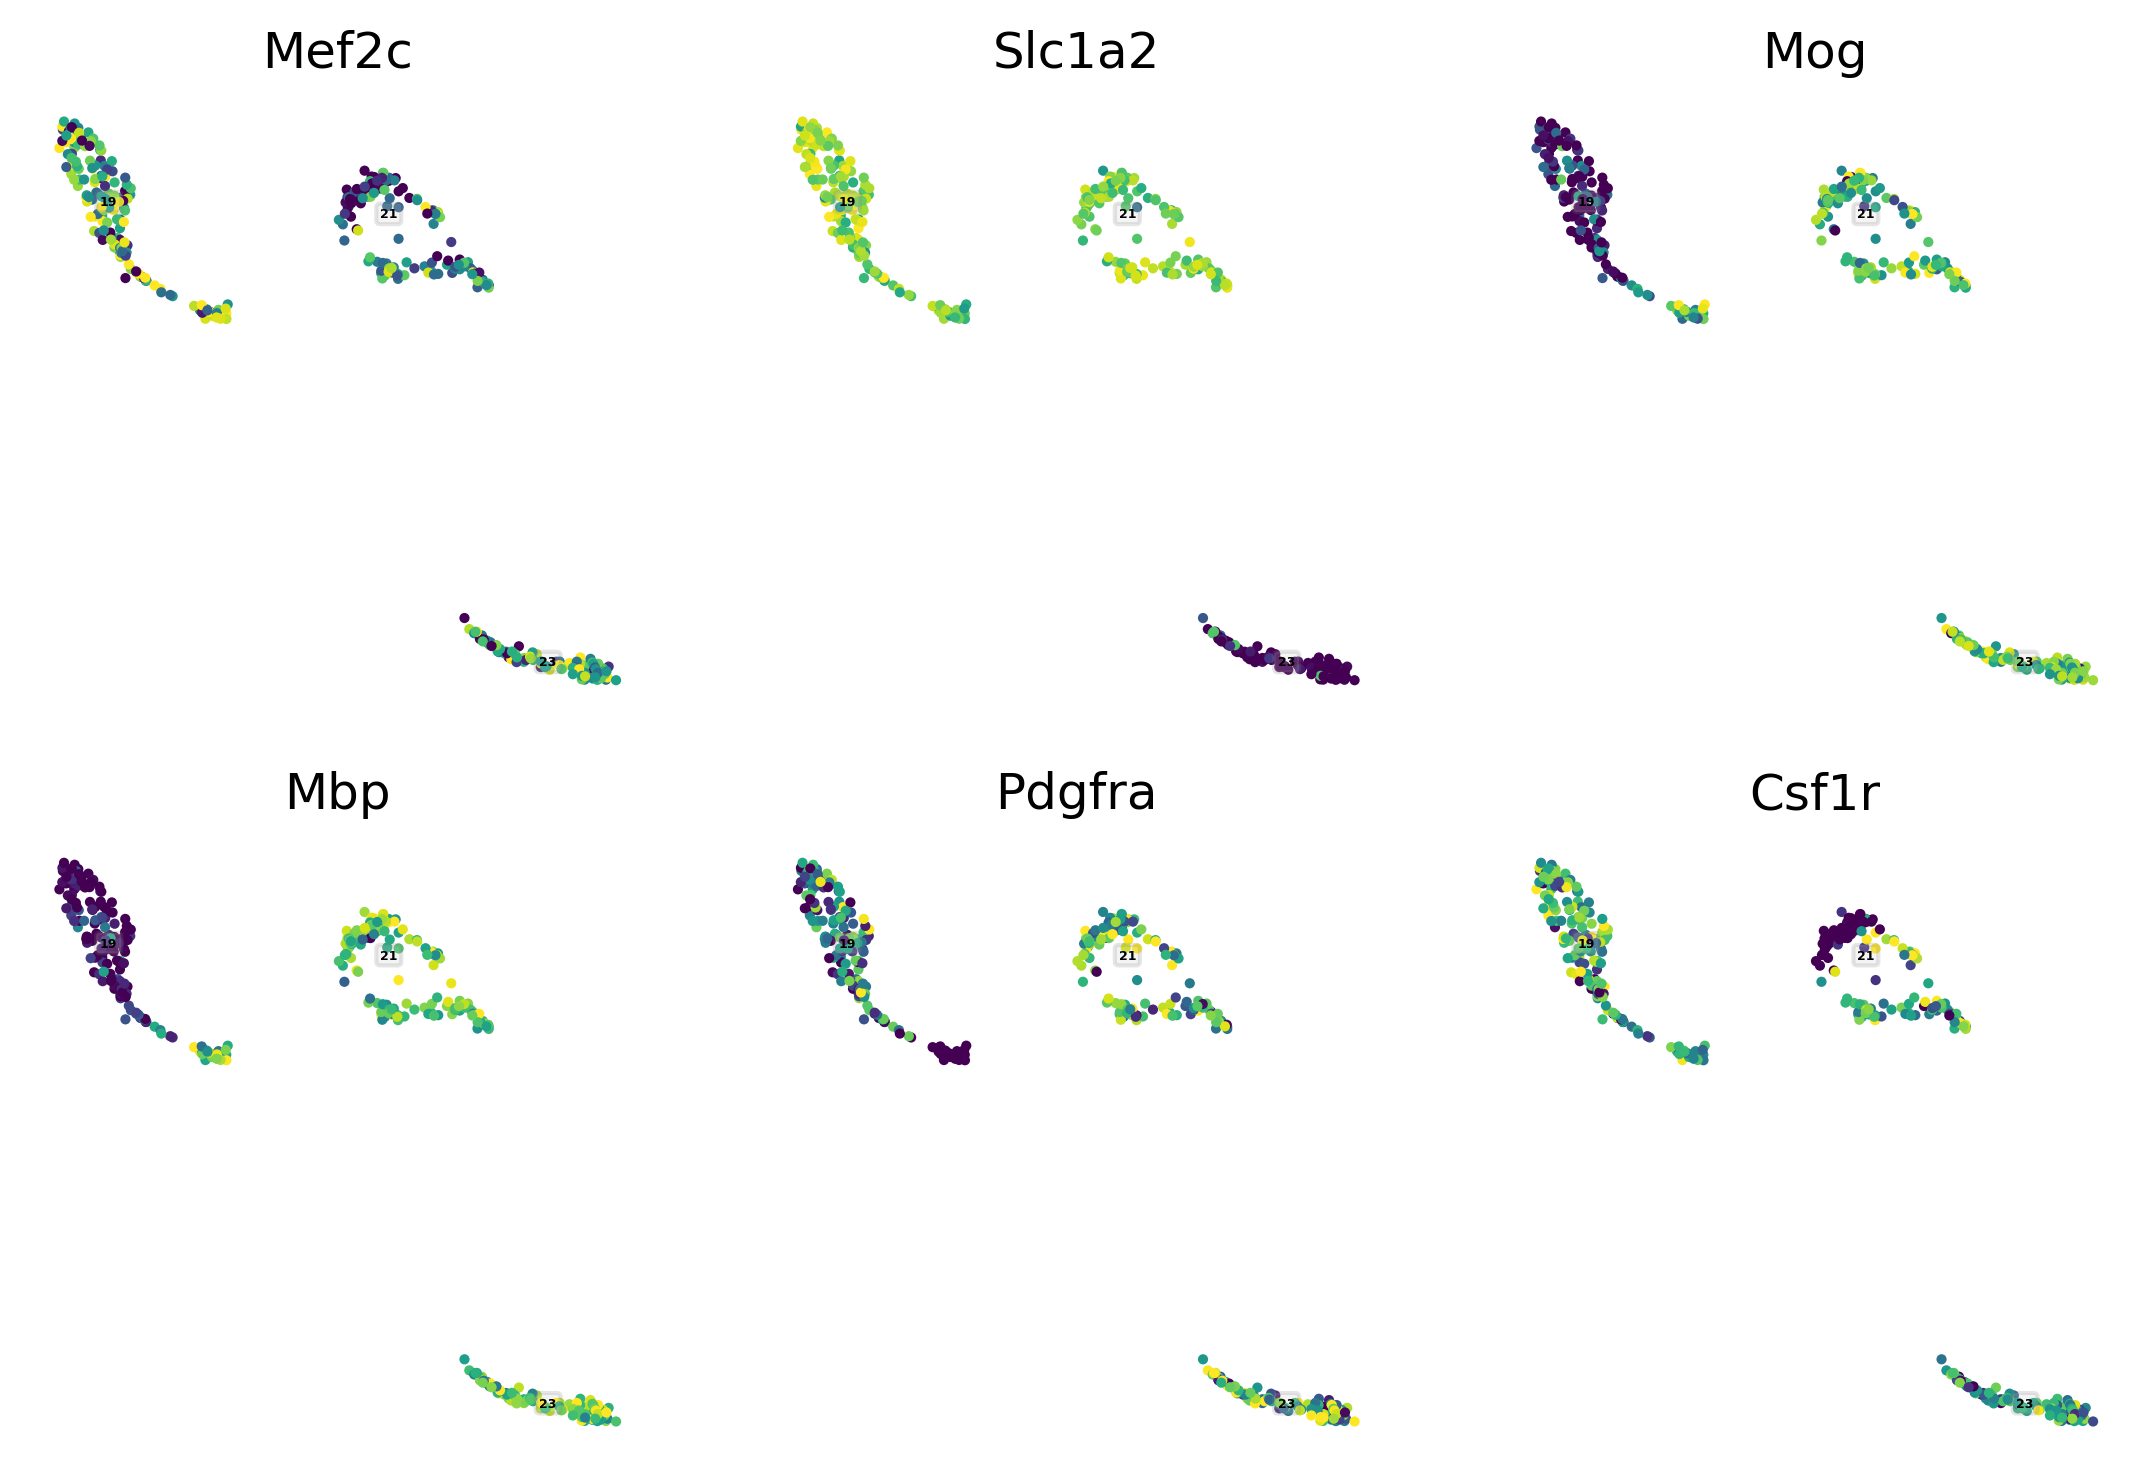

In [11]:
gene_names = ['Mef2c', 'Slc1a2', 'Mog', 
              'Mbp', 'Pdgfra', 'Csf1r']

_cell_tidy_data_cg = cell_tidy_data_cg[cell_tidy_data_cg['leiden'].isin(['19', '21', '23'])]

fig, axes = plt.subplots(figsize=(9, 6), dpi=300, nrows=2, ncols=3)
for gene_name, ax in zip(gene_names, axes.flat):
    continuous_scatter(ax=ax, data=_cell_tidy_data_cg, cmap='viridis', hue_norm=None,
                       hue=gene_name_to_id[gene_name], text_anno='leiden', scatter_kws=dict(s=6),
                       colorbar=None, axis_format=None, text_anno_kws=dict(fontsize=3))
    ax.set_title(gene_name)

### Individual Cluster Marker

In [12]:
marker_gene_df = pd.read_msgpack('./MOp_mC_clustering/mCH_marker_name.msg')\
                   .applymap(lambda i: gene_meta.loc[i, 'gene_name'])

Text(0.5, 1.0, 'Nxn')

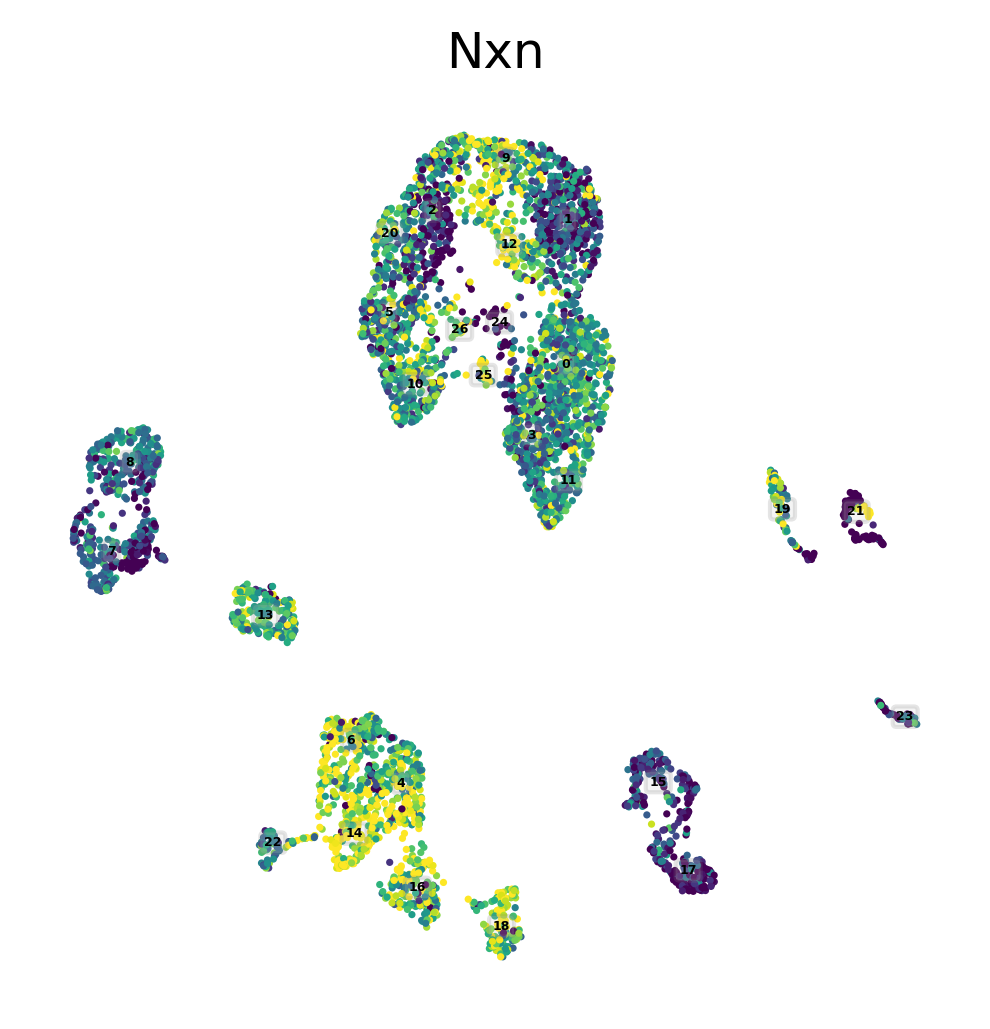

In [38]:
gene_name = marker_gene_df.iloc[3, 24]
# gene_name = 'Svil'
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
continuous_scatter(ax=ax, data=cell_tidy_data, cmap='viridis', hue_norm=None,
                   hue=gene_name_to_id[gene_name], text_anno='leiden', scatter_kws=dict(s=3),
                   colorbar=None, axis_format=None, text_anno_kws=dict(fontsize=3))
ax.set_title(gene_name)

## Cluster Annotation

- Based on marker genes
- All these markers also quite specific in RNA, checked with Allen's Public Trancriptome browser: https://celltypes.brain-map.org/rnaseq/mouse


In [39]:
cluster_manual_annotation = {
 0: 'L2-3_IT_Cux2_3',
 1: 'L4_IT_Rorb_1',
 2: 'L5_IT_Deptor_1',
 3: 'L2-3_IT_Cux2_2',
 4: 'L6_CT_Foxp2_1',
 5: 'L6_IT_Chrm2',
 6: 'L6_CT_Foxp2_2',
 7: 'MGE_Calb1',
 8: 'MGE_Pvalb',
 9: 'L4_IT_Rorb_2',
 10: 'L6_IT_Sulf1',
 11: 'L2-3_IT_Cux2_1',
 12: 'L4_IT_Rorb_3',
 13: 'L5_PT_Bcl6',
 14: 'L6_CT_Foxp2_3',
 15: 'CGE_Vip',
 16: 'L6_CT_Foxp2_4',
 17: 'CGE_Lamp5',
 18: 'L6_NP_Tshz2',
 19: 'OPC+ODC_Mog',
 20: 'L5_IT_Deptor_2',
 21: 'Micro+Endo_Csf1r',
 22: 'L6b_Svil',
 23: 'Astro_Slc1a2',
 24: 'Unknown_1',
 25: 'Unknown_2',
 26: 'Unknown_3'}

In [46]:
cell_tidy_data['MajorCluster'] = cell_tidy_data['leiden'].apply(lambda i: cluster_manual_annotation[int(i)])
cell_tidy_data['MajorCluster_ID'] = cell_tidy_data['leiden'].apply(lambda i: f'c{int(i):02d}')
cell_tidy_data.to_msgpack(result_dir / 'MOp.methylome_only.analysis_results.msg')
cell_tidy_data.to_csv(result_dir / 'MOp.methylome_only.analysis_results.tsv.gz', sep='\t')

Text(0.5, 1.0, 'leiden')

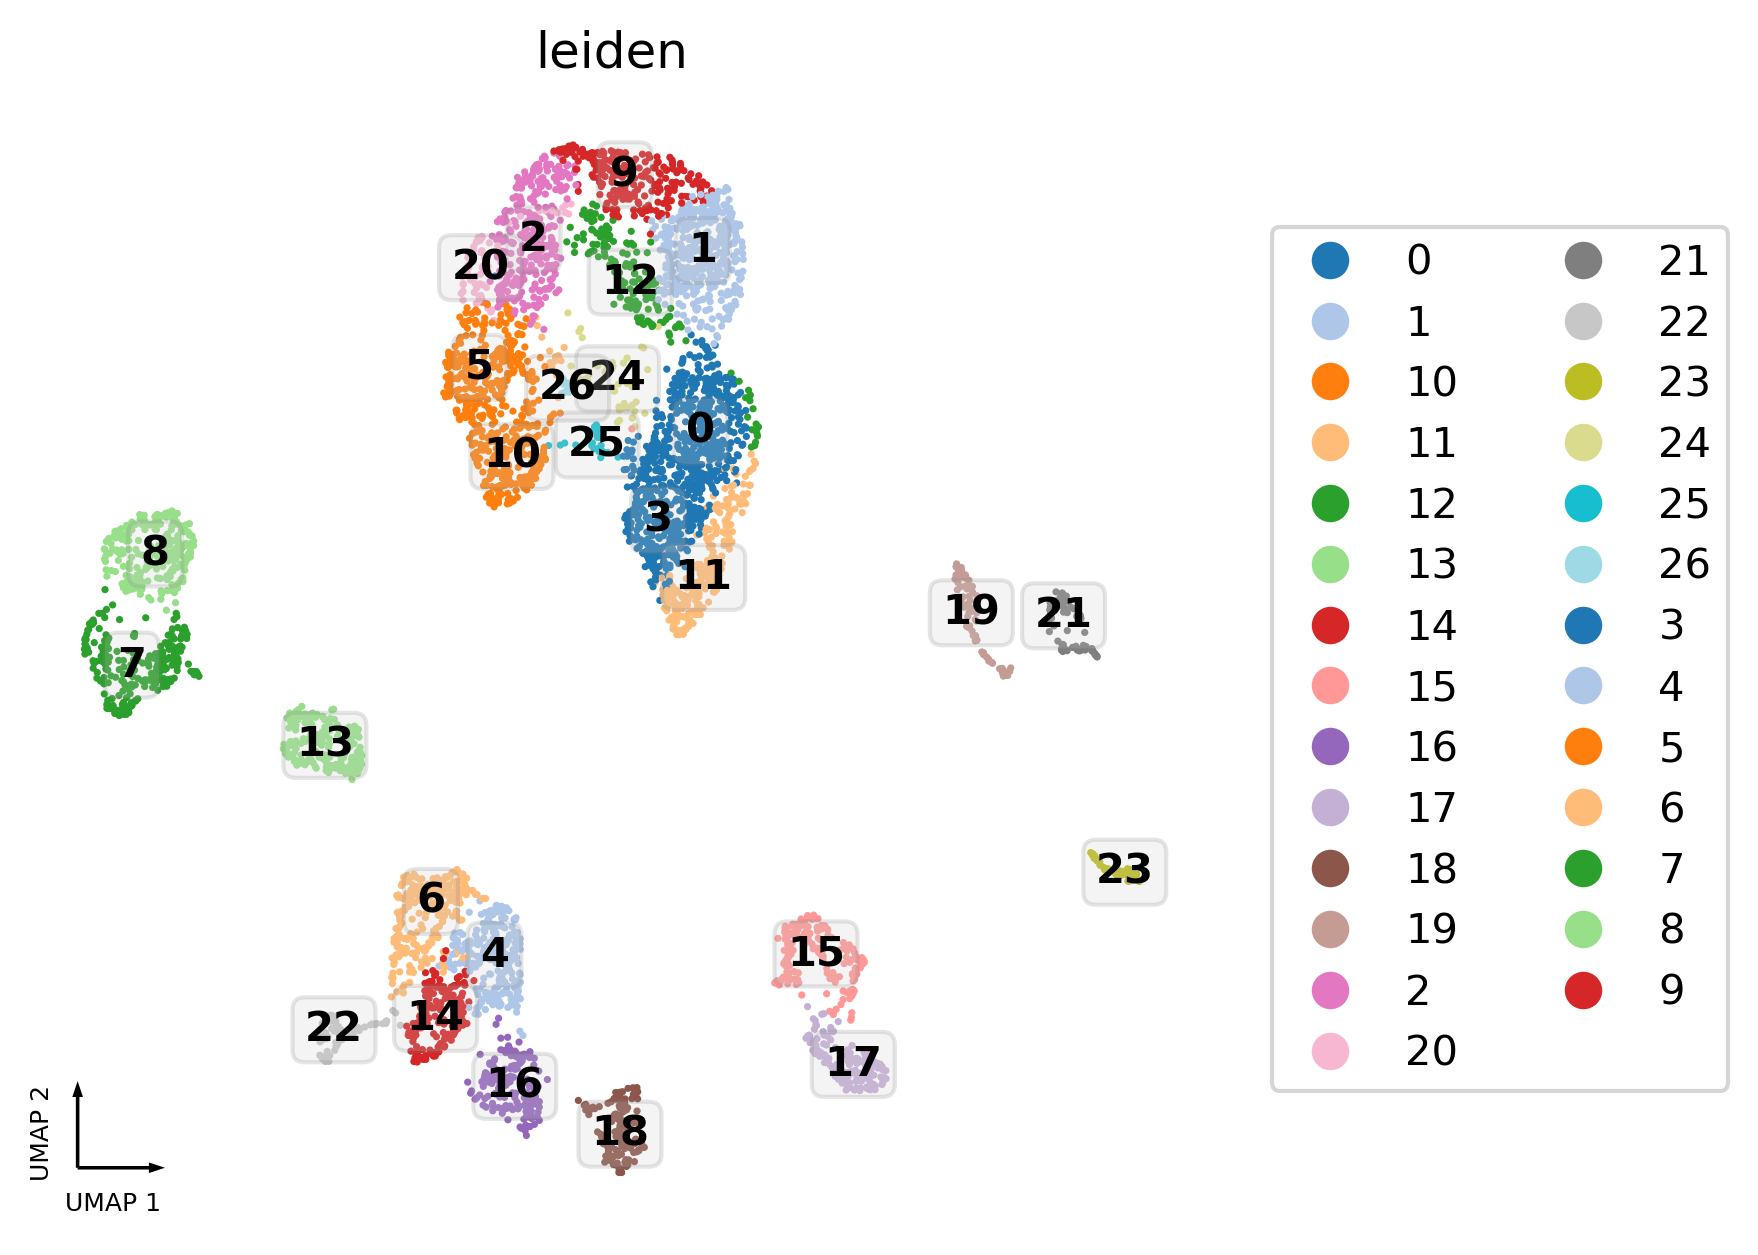

In [41]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
categorical_scatter(cell_tidy_data, 
                    ax, 
                    coord_base=_base, 
                    hue='leiden',
                    text_anno='leiden',
                    palette='tab20',
                    show_legend=True,
                    scatter_kws=dict(s=3),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)))
ax.set_title('leiden')

Text(0.5, 1.0, 'MajorCluster')

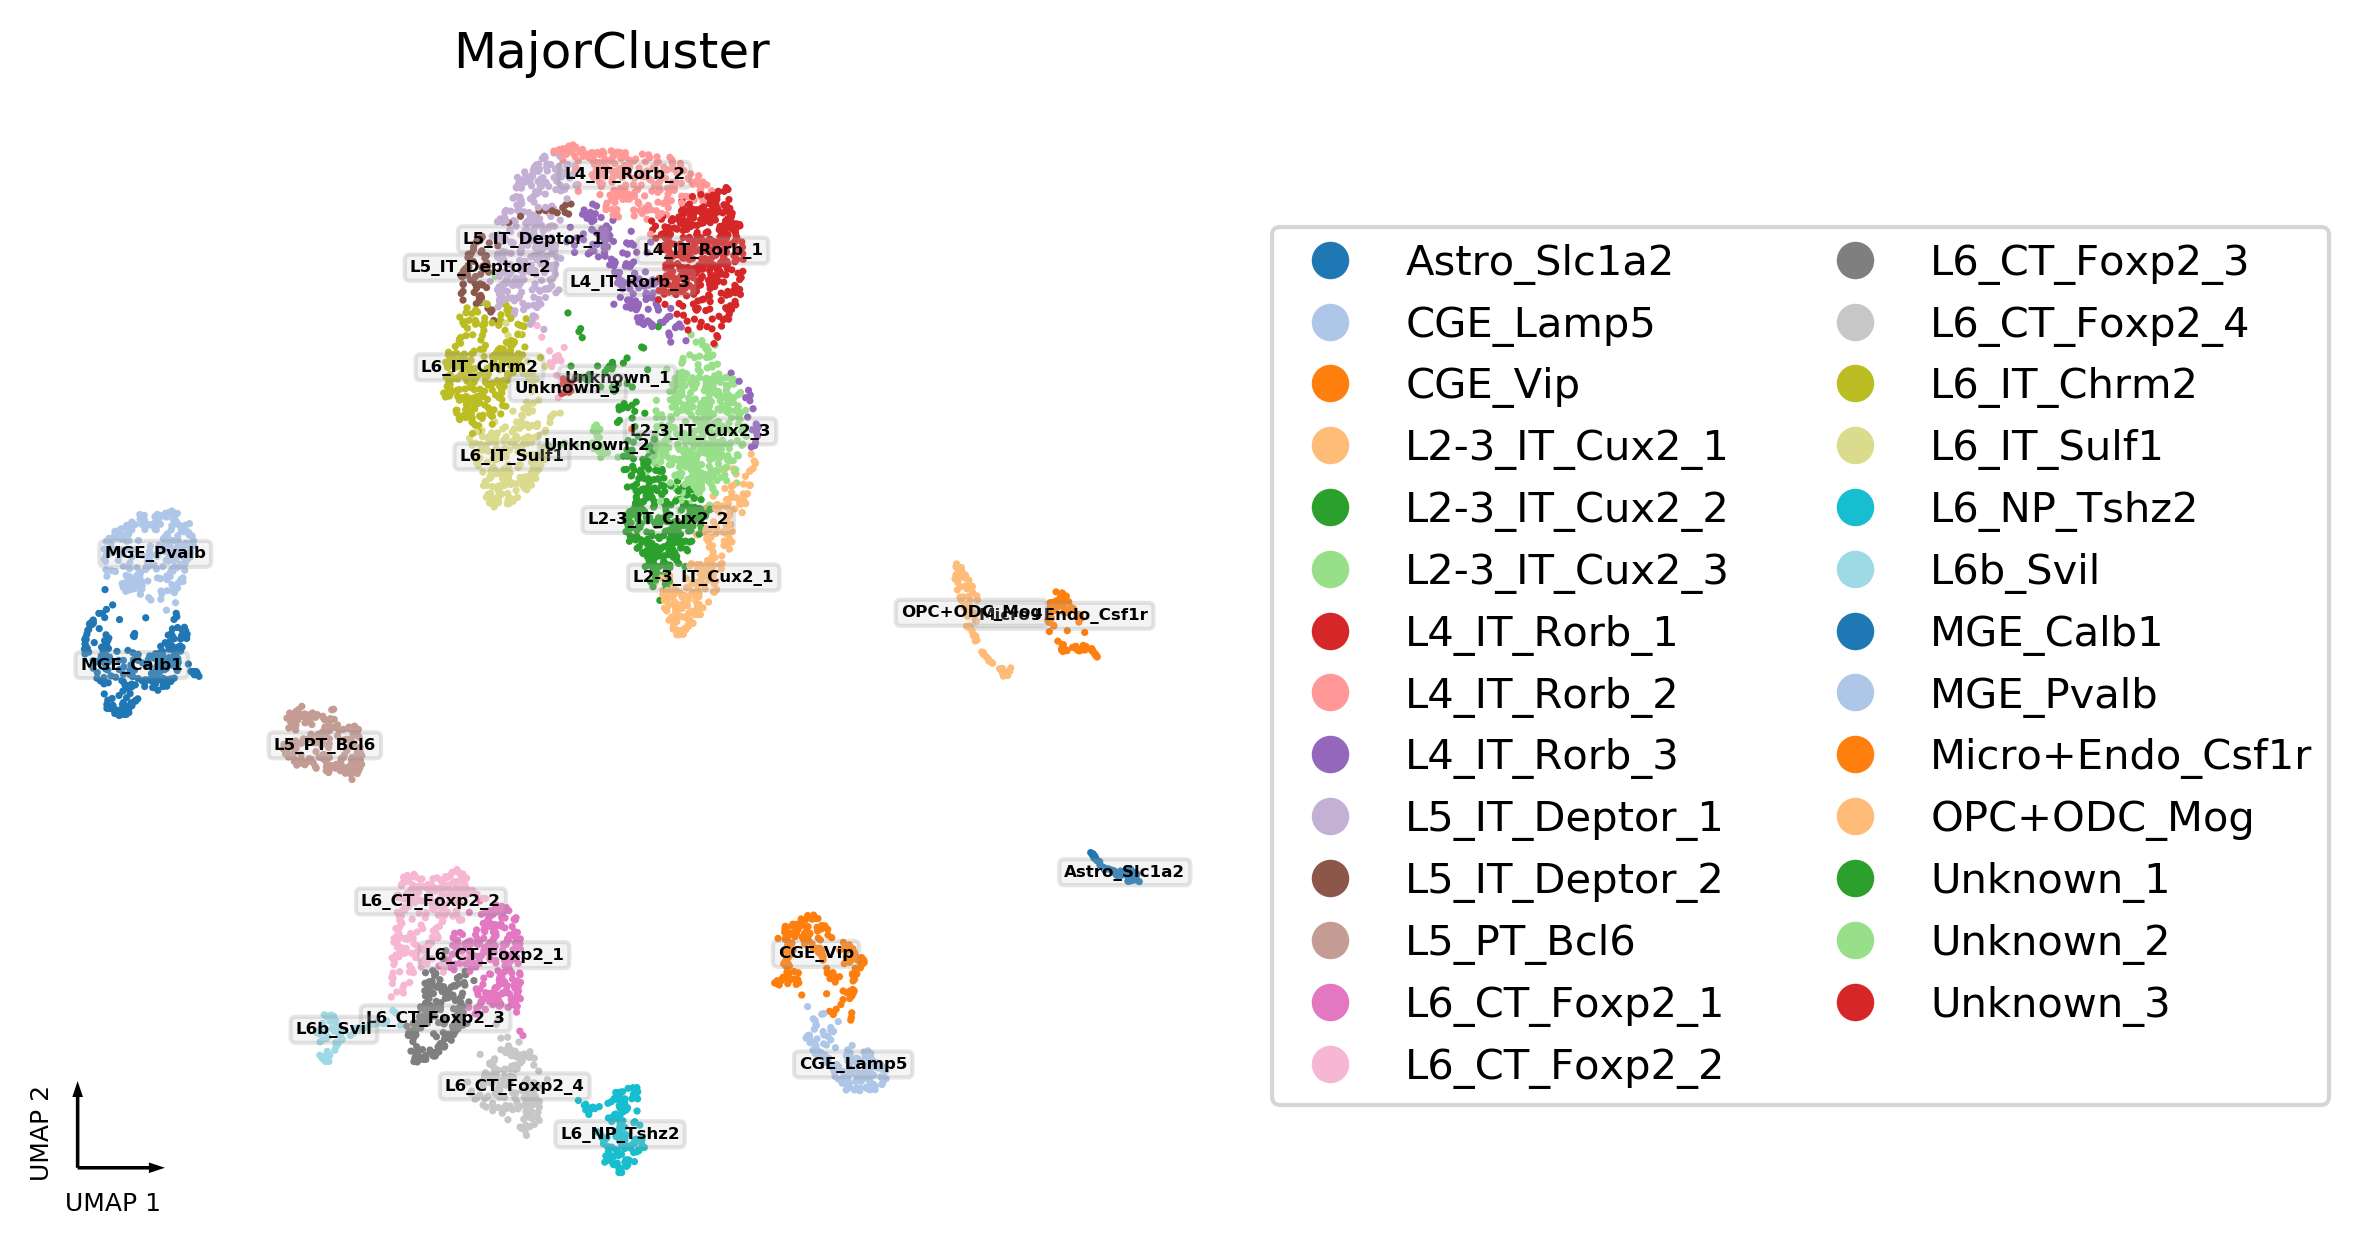

In [42]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
categorical_scatter(cell_tidy_data, 
                    ax, 
                    coord_base=_base, 
                    hue='MajorCluster',
                    text_anno='MajorCluster',
                    palette='tab20',
                    show_legend=True,
                    scatter_kws=dict(s=3),
                    text_anno_kws=dict(fontsize=4),
                    legend_kws=dict(bbox_to_anchor=(1.05, 0.9)))
ax.set_title('MajorCluster')

In [2]:
cell_tidy_data['MajorCluster'].value_counts()